7 7
[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33456827 0.3449731  0.3772271  0.40077011 0.40714759 0.40435845
 0.39535037] [6.47618748e-07 2.41762957e-07 1.07469392e-08 2.84883179e-08
 1.90037973e-07 2.88262680e-07 2.23232569e-07]
[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33472084 0.345155   0.37731911 0.40046427 0.41293224 0.4377442
 0.48388789] [3.40679542e-06 1.96049472e-06 3.17229015e-08 1.48783851e-08
 8.13331854e-07 6.49912127e-06 2.14500429e-05]


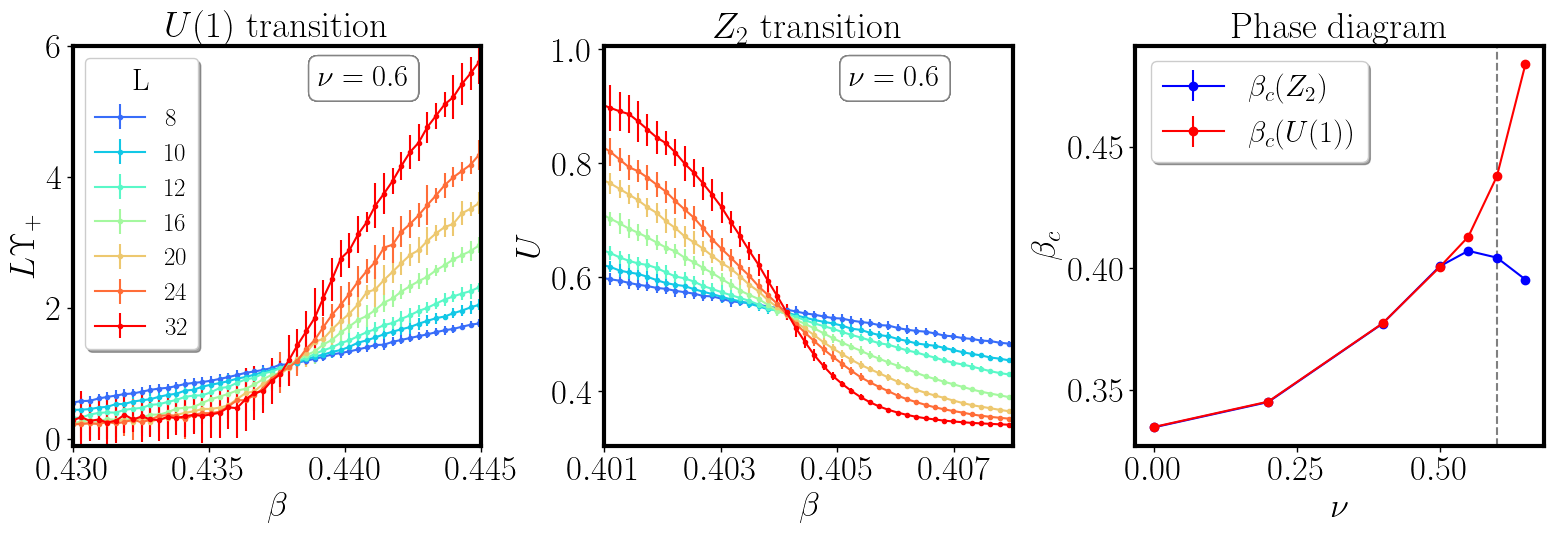

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")
save_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Draft_Paper/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(16,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[1].set_xlabel(r"$\beta$")
ax1[0].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\nu$")


ax1[1].set_ylabel(r"$ U $")
ax1[0].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[2].set_ylabel(r"$\beta_c$")

ax1[0].set_xlim((0.43,0.445))
xticks = np.arange(0.43, 0.445, 0.005)
ax1[0].set_xticks(xticks)
ax1[0].set_ylim((-0.1,6))


ax1[1].set_xlim((0.401,0.408))
xticks = np.arange(0.401, 0.408, 0.002)
ax1[1].set_xticks(xticks)


#ax1[0].set_ylim((0.25,1))
# ax1[1].set_ylim((-0.15,6))
DIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym")

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[1].errorbar(beta_U, U, yerr=err_U, fmt="o-", markersize='3', c=c_m, label="%s" %L)
    ax1[0].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[1].transAxes) 
    ax1[0].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[0].transAxes) 

ax1[0].legend(loc="best", title="L", fontsize="18")
ax1[1].set_title("$Z_2$ transition")
ax1[0].set_title("$U(1)$ transition")

dataU= np.loadtxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2))
nu=dataU[0]
betac_U=dataU[1]
err_betac_U=dataU[2]
print(len(nu), len(betac_U))
dataZ= np.loadtxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_Z=dataZ[0]
betac_Z=dataZ[1]
err_betac_Z=dataZ[2]

dataZ_B= np.loadtxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_ZB=dataZ_B[0]
betac_ZB=dataZ_B[1]
err_betac_ZB=dataZ_B[2]


ax1[2].set_title("Phase diagram")

nu, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)
print(nu, betac_z2, err_betac_z2)
nu, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)

print(nu, betac_u1, err_betac_u1)

ax1[2].errorbar(nu, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[2].errorbar(nu, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",label=r"$\beta_c(U(1))$")

#ax1[2].errorbar(nu,betac_U, yerr= err_betac_U, fmt="o-", marker='o', c="red",label=r"$\beta_c(U(1))$")
#ax1[2].errorbar(nu_Z,betac_Z, yerr= err_betac_Z, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[2].axvline(x=0.6, ls="--", c="gray")
ax1[2].legend(loc="best")
# ax1[0].grid()
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.85)
fig.savefig("%s/Fig1.png" %(save_fig) )




7 7
[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33456827 0.3449731  0.3772271  0.40077011 0.40714759 0.40435845
 0.39535037] [6.47618748e-07 2.41762957e-07 1.07469392e-08 2.84883179e-08
 1.90037973e-07 2.88262680e-07 2.23232569e-07]


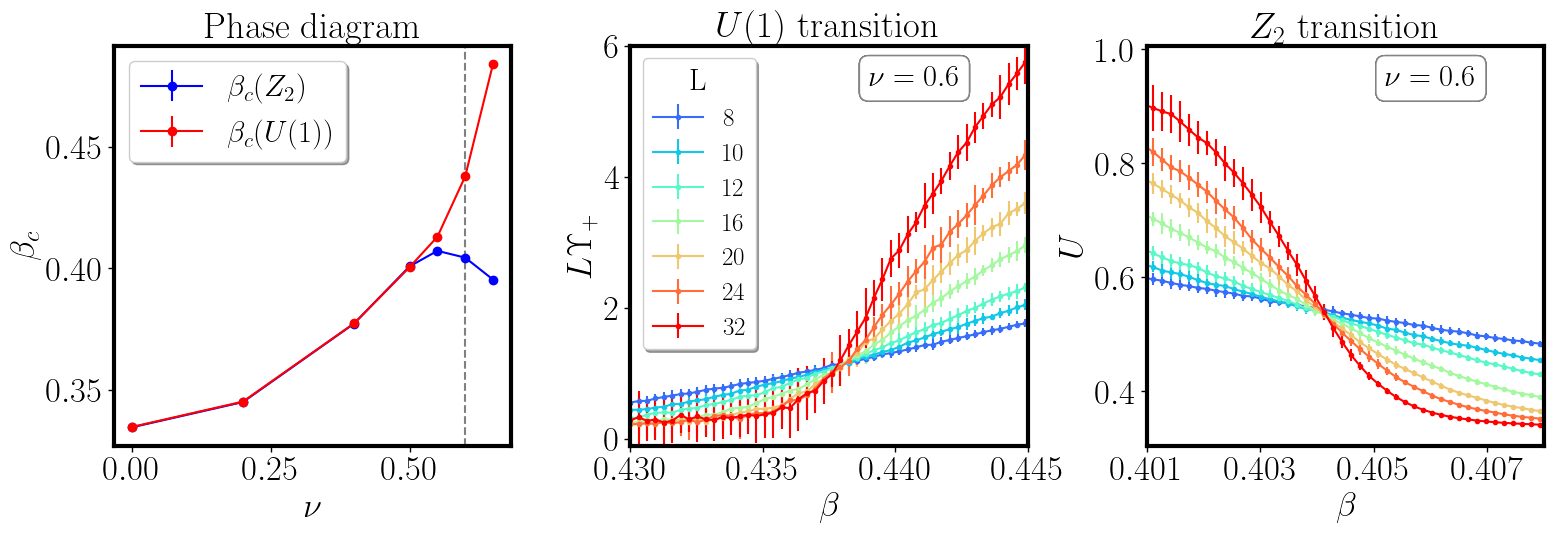

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")
save_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Draft_Paper/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(16,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_xlabel(r"$\nu$")


ax1[2].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[0].set_ylabel(r"$\beta_c$")

ax1[1].set_xlim((0.43,0.445))
xticks = np.arange(0.43, 0.445, 0.005)
ax1[1].set_xticks(xticks)
ax1[1].set_ylim((-0.1,6))


ax1[2].set_xlim((0.401,0.408))
xticks = np.arange(0.401, 0.408, 0.002)
ax1[2].set_xticks(xticks)


#ax1[0].set_ylim((0.25,1))
# ax1[1].set_ylim((-0.15,6))
DIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[2].errorbar(beta_U, U, yerr=err_U, fmt="o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].errorbar(beta, L*J_sum, yerr=L*err_J_sum, fmt= "o-", markersize='3', c=c_m, label="%s" %L)
    ax1[2].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[2].transAxes) 
    ax1[1].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[1].transAxes) 

ax1[1].legend(loc="best", title="L", fontsize="18")
ax1[2].set_title("$Z_2$ transition")
ax1[1].set_title("$U(1)$ transition")

dataU= np.loadtxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2))
nu=dataU[0]
betac_U=dataU[1]
err_betac_U=dataU[2]
print(len(nu), len(betac_U))
dataZ= np.loadtxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_Z=dataZ[0]
betac_Z=dataZ[1]
err_betac_Z=dataZ[2]

dataZ_B= np.loadtxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_ZB=dataZ_B[0]
betac_ZB=dataZ_B[1]
err_betac_ZB=dataZ_B[2]


ax1[0].set_title("Phase diagram")

nu, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)
print(nu, betac_z2, err_betac_z2)
nu, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)


ax1[0].errorbar(nu, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].errorbar(nu, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",label=r"$\beta_c(U(1))$")

#ax1[2].errorbar(nu,betac_U, yerr= err_betac_U, fmt="o-", marker='o', c="red",label=r"$\beta_c(U(1))$")
#ax1[2].errorbar(nu_Z,betac_Z, yerr= err_betac_Z, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].axvline(x=0.6, ls="--", c="gray")
ax1[0].legend(loc="best")
# ax1[0].grid()
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.85)
fig.savefig("%s/Fig1.png" %(folder_fig) )



7 7
[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33456827 0.3449731  0.3772271  0.40077011 0.40714759 0.40435845
 0.39535037] [6.47618748e-07 2.41762957e-07 1.07469392e-08 2.84883179e-08
 1.90037973e-07 2.88262680e-07 2.23232569e-07]


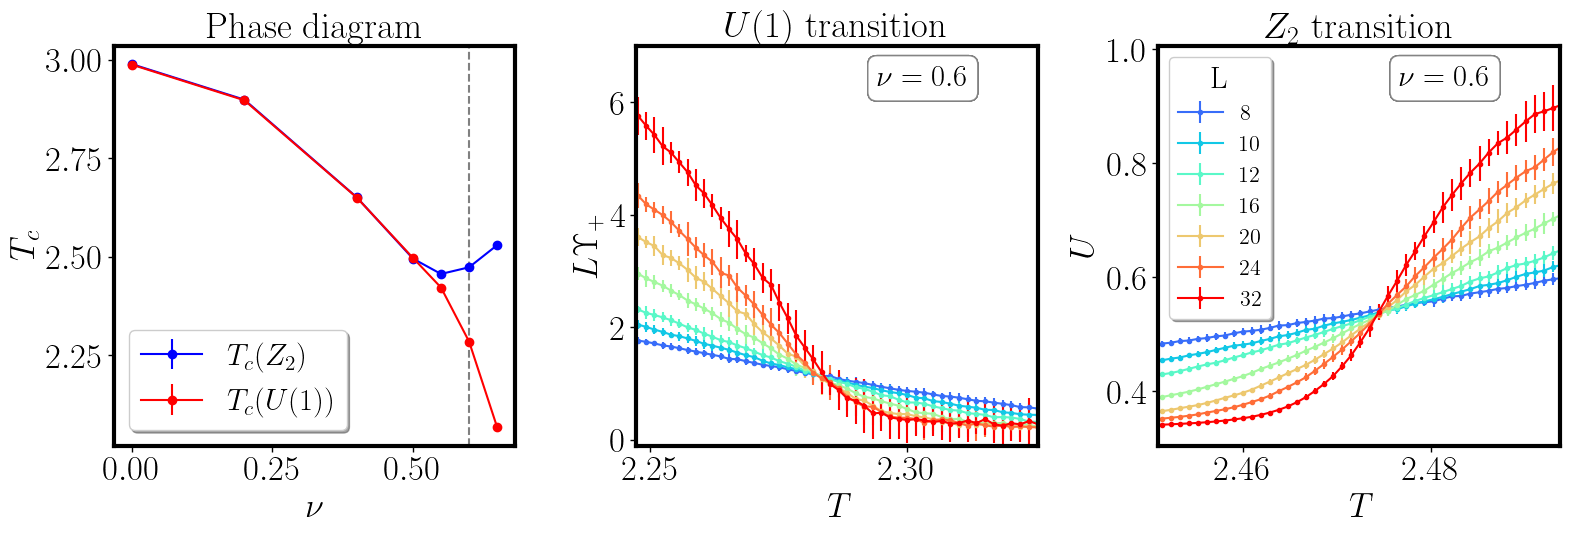

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=0
nu=0.6
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.43
bhigh=0.45
blow_U=0.4
bhigh_U=0.41
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")
save_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Draft_Paper/Figures")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(16,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[1].set_xlabel(r"$T$")
ax1[2].set_xlabel(r"$T$")
ax1[0].set_xlabel(r"$\nu$")


ax1[2].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\Upsilon_{+} $")
ax1[0].set_ylabel(r"$T_c$")

ax1[1].set_xlim((1./0.445,1./0.43))
# xticks = np.arange(0.43, 0.445, 0.005)
# ax1[1].set_xticks(xticks)
ax1[1].set_ylim((-0.1,7))


ax1[2].set_xlim((1./0.408,1./0.401))
# xticks = np.arange(0.401, 0.408, 0.002)
# ax1[2].set_xticks(xticks)


#ax1[0].set_ylim((0.25,1))
# ax1[1].set_ylim((-0.15,6))
DIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
    HOMEDIR_U=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow_U, bhigh_U, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR_U)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    beta, J_sum, err_J_sum=np.loadtxt("%s/Helicity_modulus_sum.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    beta, J_diff, err_J_diff=np.loadtxt("%s/Helicity_modulus_diff.txt" %HOMEDIR,  usecols=(0,1,2), unpack=True )
    
    T=1./beta

    data_Cv_U=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR_U)
    beta_U= data_Cv_U[0]
    Cv_U= data_Cv_U[1]
    err_Cv_U= data_Cv_U[2]  
    
    T_U=1./beta_U

    data_Cv=np.loadtxt("%s/Specific_Heat.txt" %HOMEDIR)
    beta= data_Cv[0]
    Cv= data_Cv[1]
    err_Cv= data_Cv[2]    
    
    ax1[2].errorbar(T_U, U, yerr=err_U, fmt="o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].errorbar(T, L*J_sum, yerr=L*err_J_sum, fmt= "o-", markersize='3', c=c_m, label="%s" %L)
    ax1[2].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[2].transAxes) 
    ax1[1].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[1].transAxes) 

ax1[2].legend(loc="best", title="L", fontsize="16")
ax1[2].set_title("$Z_2$ transition")
ax1[1].set_title("$U(1)$ transition")

dataU= np.loadtxt("%s/betac_U1_eta2%s.txt" %(folder_fig, eta2))
nu=dataU[0]
betac_U=dataU[1]
err_betac_U=dataU[2]
print(len(nu), len(betac_U))
dataZ= np.loadtxt("%s/betac_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_Z=dataZ[0]
betac_Z=dataZ[1]
err_betac_Z=dataZ[2]

dataZ_B= np.loadtxt("%s/betac_Binder_Z2_eta2%s.txt" %(folder_fig, eta2))
nu_ZB=dataZ_B[0]
betac_ZB=dataZ_B[1]
err_betac_ZB=dataZ_B[2]


ax1[0].set_title("Phase diagram")

nu, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)
print(nu, betac_z2, err_betac_z2)
nu, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_vs_nu_eta2%s_e%s.txt" %(DIR, eta2, e), usecols=(0,1,2), unpack=True)


ax1[0].errorbar(nu, 1./betac_z2, yerr=err_betac_z2/(betac_z2**2), fmt="o-", c="blue", label=r"$T_c(Z_2)$")
ax1[0].errorbar(nu, 1./betac_u1, yerr=err_betac_u1/(betac_u1**2), fmt="o-", c="red",label=r"$T_c(U(1))$")

#ax1[2].errorbar(nu,betac_U, yerr= err_betac_U, fmt="o-", marker='o', c="red",label=r"$\beta_c(U(1))$")
#ax1[2].errorbar(nu_Z,betac_Z, yerr= err_betac_Z, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].axvline(x=0.6, ls="--", c="gray")
ax1[0].legend(loc="best")
# ax1[0].grid()
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.85)
fig.savefig("%s/Fig1.png" %(folder_fig) )



[0.7 0.8 0.9 1. ] [0.47908856 0.44453877 0.42170472 0.40453452] [4.26815189e-07 5.63130455e-07 3.22834226e-07 1.23023081e-07]
[0.7 0.8 0.9 1. ] [0.66287241 0.55934532 0.48833092 0.4377442 ] [3.13780116e-05 2.32523137e-05 4.11575205e-05 6.49912127e-06]
[0.7 0.8 0.9 1. ] [0.48501408 0.43696998 0.40211424 0.37719717] [1.12374650e-06 1.35567575e-06 3.67081491e-07 5.95393757e-09]
[0.7 0.8 0.9 1. ] [0.42954436 0.41108096 0.39155438 0.37729667] [8.70675382e-06 2.18937787e-05 1.40638234e-05 3.47975059e-08]


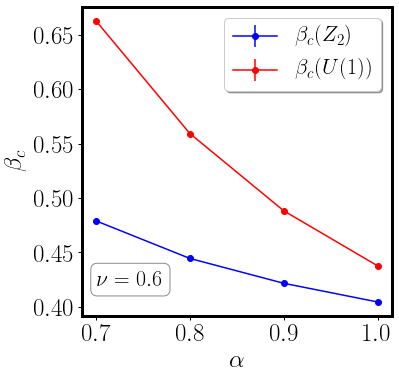

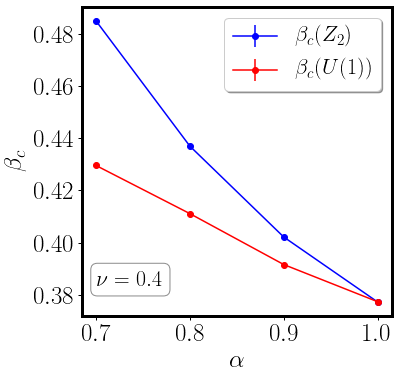

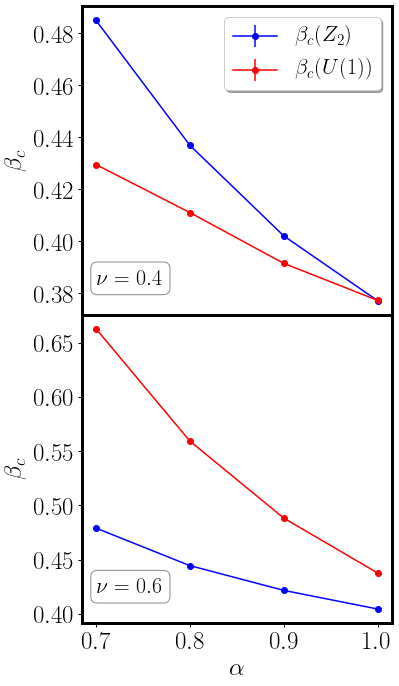

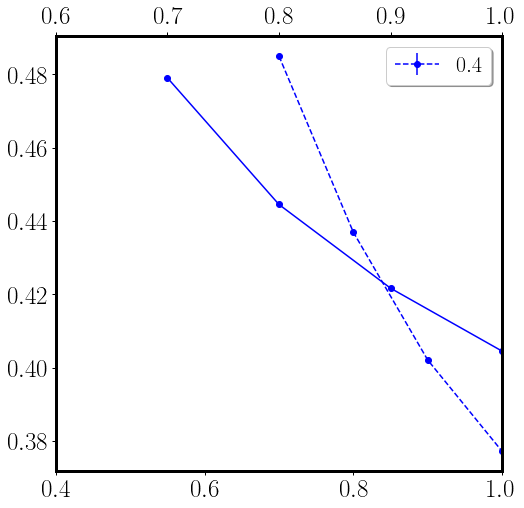

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)




nu=0.6
eta2=0.1
e=0

HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

alpha, nu06_betac_z2, nu06_err_betac_z2 = np.loadtxt("%s/betac_z2_vs_alpha_nu%s_eta2%s_e%s.txt" %(HOMEDIR, nu, eta2, e), usecols=(0,1,2), unpack=True)
print(alpha, nu06_betac_z2, nu06_err_betac_z2)

alpha, nu06_betac_u1, nu06_err_betac_u1 = np.loadtxt("%s/betac_u1_vs_alpha_nu%s_eta2%s_e%s.txt" %(HOMEDIR, nu, eta2, e), usecols=(0,1,2), unpack=True)
print(alpha, nu06_betac_u1, nu06_err_betac_u1)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#fig.suptitle(r"$e=%s$; $\nu=%s$; $\eta_2=%s$" %(e, nu, eta2))
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(alpha, nu06_betac_z2, yerr=nu06_err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(alpha, nu06_betac_u1, yerr=nu06_err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax1.text(0.05, 0.1, r"$\nu=%s$" %nu, bbox=bbox_props, transform=ax1.transAxes) 

ax1.legend(loc="best")

folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")
fig.tight_layout()
fig.subplots_adjust( top=0.9)
fig.savefig("%s/betac_crossings_vs_alpha_nu%s_eta2%s_e%s.png" %(folder_fig,nu, eta2, e) )


nu=0.4
eta2=0.1
e=0

HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

alpha, nu04_betac_z2, nu04_err_betac_z2 = np.loadtxt("%s/betac_z2_vs_alpha_nu%s_eta2%s_e%s.txt" %(HOMEDIR, nu, eta2, e), usecols=(0,1,2), unpack=True)
print(alpha, nu04_betac_z2, nu04_err_betac_z2)

alpha, nu04_betac_u1, nu04_err_betac_u1 = np.loadtxt("%s/betac_u1_vs_alpha_nu%s_eta2%s_e%s.txt" %(HOMEDIR, nu, eta2, e), usecols=(0,1,2), unpack=True)
print(alpha, nu04_betac_u1, nu04_err_betac_u1)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#fig.suptitle(r"$e=%s$; $\nu=%s$; $\eta_2=%s$" %(e, nu, eta2))
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(alpha, nu04_betac_z2, yerr=nu04_err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(alpha, nu04_betac_u1, yerr=nu04_err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax1.text(0.05, 0.1, r"$\nu=%s$" %nu, bbox=bbox_props, transform=ax1.transAxes) 

ax1.legend(loc="best")

folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")
fig.tight_layout()
fig.subplots_adjust( top=0.9)
fig.savefig("%s/betac_crossings_vs_alpha_nu%s_eta2%s_e%s.png" %(folder_fig,nu, eta2, e) )


fig2, ax2 = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,10))
ax2[0].set_ylabel(r"$\beta_c$")
ax2[1].set_ylabel(r"$\beta_c$")
ax2[1].set_xlabel(r"$\alpha$")

ax2[0].errorbar(alpha, nu04_betac_z2, yerr=nu04_err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax2[0].errorbar(alpha, nu04_betac_u1, yerr=nu04_err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax2[0].text(0.05, 0.1, r"$\nu=%s$" %nu, bbox=bbox_props, transform=ax2[0].transAxes) 

ax2[0].legend(loc="best")
ax2[1].errorbar(alpha, nu06_betac_z2, yerr=nu06_err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax2[1].errorbar(alpha, nu06_betac_u1, yerr=nu06_err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax2[1].text(0.05, 0.1, r"$\nu=0.6$", bbox=bbox_props, transform=ax2[1].transAxes) 

fig2.tight_layout()

fig2.subplots_adjust(hspace=0)
fig2.savefig("%s/Fig2_anisotropy.png" %(folder_fig) )

fig3 = plt.figure()
ax1 = fig3.add_subplot(111)
ax2 = ax1.twiny()
ax1.set_xlim((0.4,1))
ax2.set_xlim((0.6,1))
ax1.errorbar(alpha, nu04_betac_z2, yerr=nu04_err_betac_z2, fmt="o--", c="blue", label=r"$0.4$")
ax2.errorbar(alpha, nu06_betac_z2, yerr=nu06_err_betac_z2, fmt="o-", c="blue", label=r"$0.6$")
ax1.legend(loc="best")


[0.   0.2  0.4  0.5  0.55 0.6  0.65] [0.33456827 0.3449731  0.3772271  0.40077011 0.40714759 0.40435845
 0.39535037] [6.47618748e-07 2.41762957e-07 1.07469392e-08 2.84883179e-08
 1.90037973e-07 2.88262680e-07 2.23232569e-07]


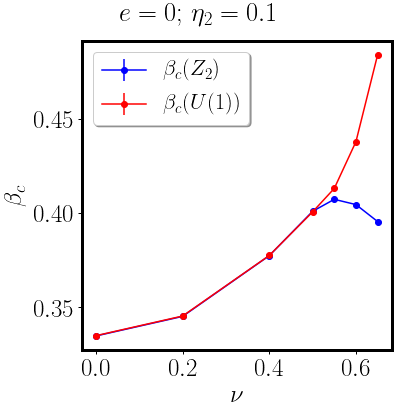

In [3]:

alpha=1
eta2=0.1
e=0

HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

nu, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_vs_nu_eta2%s_e%s.txt" %(HOMEDIR, eta2, e), usecols=(0,1,2), unpack=True)
print(nu, betac_z2, err_betac_z2)
nu, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_vs_nu_eta2%s_e%s.txt" %(HOMEDIR, eta2, e), usecols=(0,1,2), unpack=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
fig.suptitle(r"$e=%s$; $\eta_2=%s$" %(e, eta2))
ax1.set_xlabel(r"$\nu$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(nu, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(nu, betac_u1, yerr=err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
#ax1.errorbar(nu, -betac_z2+betac_u1, yerr=err_betac_z2, fmt="o-", label=r"$\beta_c(Z_2)$")

ax1.legend(loc="best")
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_eta2%s_e%s" %(eta2, e))
fig.tight_layout()
fig.subplots_adjust( top=0.9)

fig.savefig("%s/betac_crossings_vs_nu_eta2%s_e%s.png" %(folder_fig, eta2, e) )

[  0.1  10.   20.   50.  100. ] [0.3772996  0.32459187 0.31911407 0.31628152 0.31543803] [1.15258745e-08 1.35246954e-07 6.81812787e-08 1.00437933e-07
 1.47965577e-04]


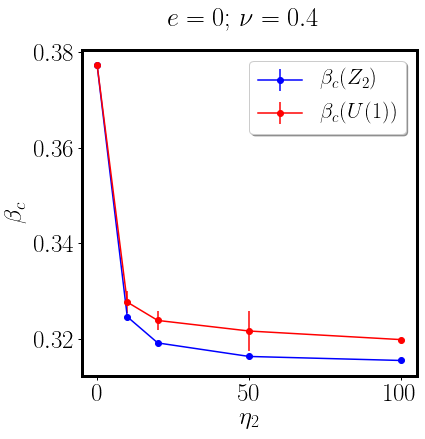

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

alpha=1
nu=0.4
e=0

folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/" )
HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

eta2, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_e%s_nu%s_vs_eta.txt" %(HOMEDIR, e, nu), usecols=(0,1,2), unpack=True)
print(eta2, betac_z2, err_betac_z2)
eta2, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_e%s_nu%s_vs_eta.txt" %(HOMEDIR, e, nu), usecols=(0,1,2), unpack=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
fig.suptitle(r"$e=%s$; $\nu=%s$" %(e, nu))
ax1.set_xlabel(r"$\eta_2$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(eta2, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(eta2, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",  label=r"$\beta_c(U(1))$")

ax1.legend(loc="best")
fig.savefig("%s/betac_nu%s_vs_eta2.png" %(save_fig, nu) )

[ 0.1 10.  50. ] [0.33456827 0.32153216 0.31865247] [6.47618748e-07 1.68847379e-08 3.76366615e-08]


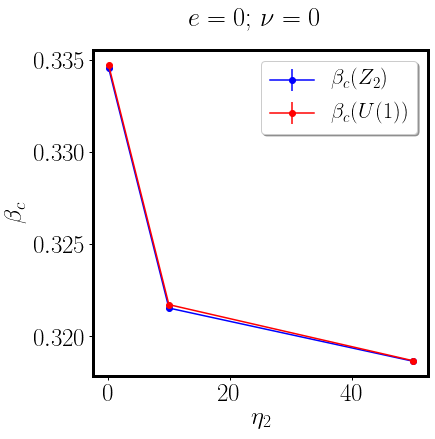

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

alpha=1
nu=0
e=0

folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/" )
HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

eta2, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_e%s_nu%s_vs_eta2.txt" %(HOMEDIR, e, nu), usecols=(0,1,2), unpack=True)
print(eta2, betac_z2, err_betac_z2)
eta2, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_e%s_nu%s_vs_eta2.txt" %(HOMEDIR, e, nu), usecols=(0,1,2), unpack=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
fig.suptitle(r"$e=%s$; $\nu=%s$" %(e, nu))
ax1.set_xlabel(r"$\eta_2$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(eta2, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(eta2, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",  label=r"$\beta_c(U(1))$")

ax1.legend(loc="best")
fig.savefig("%s/betac_nu%s_vs_eta2.png" %(folder_fig, nu) )

[0.  1.  1.5 2.  2.5] [0.3449731  0.41962738 0.47982034 0.52554449 0.54068199] [2.41762957e-07 3.26306831e-08 1.38627605e-07 2.23642095e-06
 6.64928389e-06]
[0.  1.  1.5 2.  2.5] [0.33456827 0.42197816 0.49941145 0.57691132 0.63043693] [6.47618748e-07 2.42593128e-07 2.10426059e-07 5.15202266e-07
 1.93811427e-06]


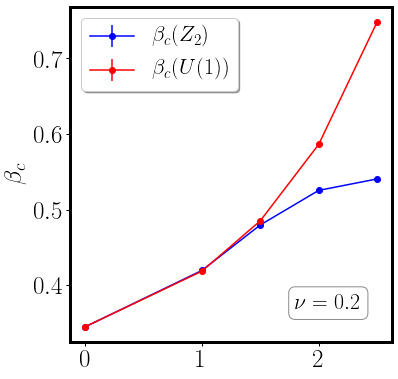

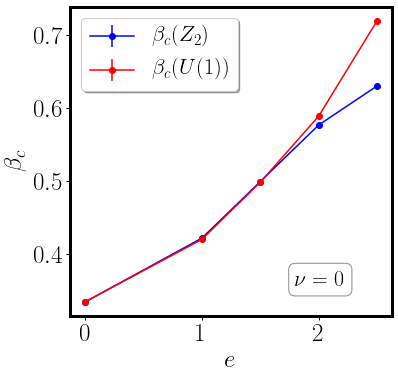

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


alpha=1
eta2=0.1

HOMEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

####################################################
nu=0.2

e, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_eta2%s_nu%s_vs_e.txt" %(HOMEDIR, eta2, nu), usecols=(0,1,2), unpack=True)
print(e, betac_z2, err_betac_z2)
e, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_eta2%s_nu%s_vs_e.txt" %(HOMEDIR, eta2, nu), usecols=(0,1,2), unpack=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
#ax1[0].set_xlabel(r"$e$")
ax1.set_ylabel(r"$\beta_c$")


ax1.errorbar(e, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(e, betac_u1, yerr=err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax1.text(0.7, 0.1, r"$\nu=%s$" %nu, bbox=bbox_props, transform=ax1.transAxes) 
ax1.legend(loc="best")


folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Draft_Paper/Figures")
fig.tight_layout()
fig.subplots_adjust( top=0.9)

fig.savefig("%s/betac_crossings_vs_e_eta2%s_nu%s.png" %(folder_fig, eta2, nu) )

####################################################
nu=0

e, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_eta2%s_nu%s_vs_e.txt" %(HOMEDIR, eta2, nu), usecols=(0,1,2), unpack=True)
print(e, betac_z2, err_betac_z2)
e, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_eta2%s_nu%s_vs_e.txt" %(HOMEDIR, eta2, nu), usecols=(0,1,2), unpack=True)

fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(6,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1.set_xlabel(r"$e$")
ax1.set_ylabel(r"$\beta_c$")

ax1.errorbar(e, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1.errorbar(e, betac_u1, yerr=err_betac_u1, fmt="o-", c="red", label=r"$\beta_c(U(1))$")
ax1.text(0.7, 0.1, r"$\nu=%s$" %nu, bbox=bbox_props, transform=ax1.transAxes) 
ax1.legend(loc="best")


folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Draft_Paper/Figures")
fig.tight_layout()
fig.subplots_adjust( top=0.9)

fig.savefig("%s/betac_crossings_vs_e_eta2%s_nu%s.png" %(folder_fig, eta2, nu) )

[0.  1.  1.5 2.  2.5] [0.3449731  0.41962738 0.47982034 0.52554449 0.54068199] [2.41762957e-07 3.26306831e-08 1.38627605e-07 2.23642095e-06
 6.64928389e-06]


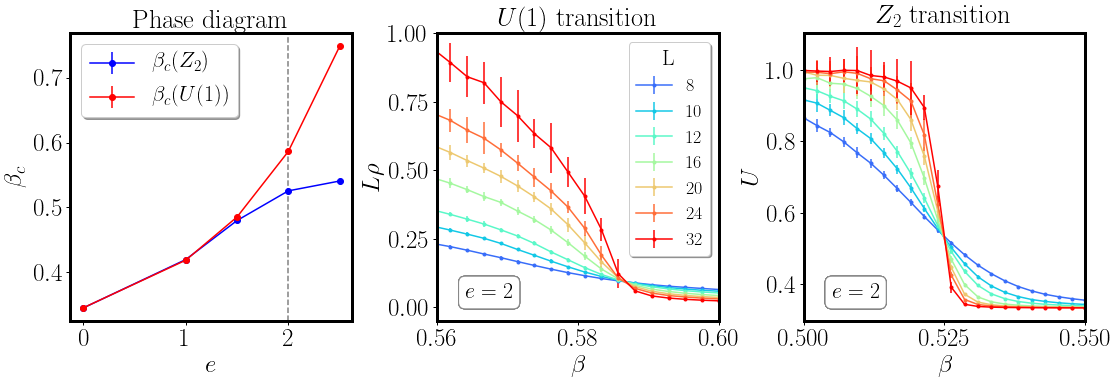

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import sys
import os
import math
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
import scipy.integrate as integrate
import random
from scipy.optimize import fsolve
from scipy.optimize import bisect
from scipy.optimize import curve_fit

plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{bm}')
plt.rcParams['font.family'] = 'Times New Roman'
#plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['axes.linewidth']  = 3.0
plt.rcParams['axes.labelsize']  = 25
plt.rcParams.update({'font.size': 22})
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['ytick.major.size'] = 4
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['legend.fontsize']  = 22
plt.rcParams['legend.frameon']  = True
plt.rcParams["legend.fancybox"] = True
plt.rcParams["legend.shadow"] = True
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["axes.facecolor"] = 'white'
plt.rcParams["axes.edgecolor"] = 'black'

plt.rcParams['figure.figsize'] = 8, 8

plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 0
plt.rcParams['ytick.minor.width'] = 0
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)


e=2
nu=0.2
h=1
rho=1
alpha=1
eta1=0
eta2=0.1
blow=0.45
bhigh=0.6
Hinit=1
nMAX=30

LLIST=[8, 10,12, 16, 20, 24, 32]

BASEDIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/e_%s/nu_%s/eta2_%s/h_%s" %(e, nu, eta2, h))
folder_fig=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/Figures_new")

fig, ax1 = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(16,6))
#fig.suptitle(r"$\nu=%s$; $\eta_2=%s$" %(nu, eta2))
ax1[1].set_xlabel(r"$\beta$")
ax1[2].set_xlabel(r"$\beta$")
ax1[0].set_xlabel(r"$e$")


ax1[2].set_ylabel(r"$ U $")
ax1[1].set_ylabel(r"$ L\rho $")
ax1[0].set_ylabel(r"$\beta_c$")

ax1[1].set_xlim((0.56,0.6))
xticks = np.arange(0.56, 0.61, 0.02)
ax1[1].set_xticks(xticks)
ax1[1].set_ylim((-0.05,1))


ax1[2].set_xlim((0.5,0.55))
xticks = np.arange(0.5, 0.56, 0.025)
ax1[2].set_xticks(xticks)

DIR=("/home/ilaria/Desktop/MultiComponent_VillainModel/Output_Villain_2C/Model_Sym/")

color=iter(plt.cm.rainbow(np.linspace(0,1,len(LLIST)+1)))
c_m=next(color)
for L in LLIST:
    c_m=next(color)

    HOMEDIR=("%s/L%s_rho%s_alpha%s_eta1%s_eta2%s_e%s_h%s_nu%s_bmin%s_bmax%s_nMAX%s_init%s" 
             %(BASEDIR, L, rho, alpha, eta1, eta2, e, h, nu, blow, bhigh, nMAX, Hinit))
        
    data_U=np.loadtxt("%s/Binder_cumulant.txt" %HOMEDIR)
    beta_U= data_U[0]
    U= data_U[1]
    err_U= data_U[2]

    data_rhoz=np.loadtxt("%s/Dual_Stiffness.txt" %HOMEDIR )
    beta_rhoz= data_rhoz[0]
    rhoz= data_rhoz[1]
    err_rhoz= data_rhoz[2]
    
    ax1[2].errorbar(beta_U, U, yerr=err_U, fmt="o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].errorbar(beta_rhoz, L*rhoz, yerr=L*err_rhoz, fmt= "o-", markersize='3', c=c_m, label="%s" %L)
    ax1[1].text(0.1, 0.08, r"$e=2$", bbox=bbox_props, transform=ax1[1].transAxes) 
    ax1[2].text(0.1, 0.08, r"$e=2$", bbox=bbox_props, transform=ax1[2].transAxes) 

    # ax1[2].text(0.6, 0.9, r"$\nu=0.6$", bbox=bbox_props, transform=ax1[2].transAxes) 

ax1[1].legend(loc="best", title="L", fontsize="18")
ax1[2].set_title("$Z_2$ transition")
ax1[1].set_title("$U(1)$ transition")

e, betac_z2, err_betac_z2 = np.loadtxt("%s/betac_z2_eta2%s_nu%s_vs_e.txt" %(DIR, eta2, nu), usecols=(0,1,2), unpack=True)
print(e, betac_z2, err_betac_z2)
e, betac_u1, err_betac_u1 = np.loadtxt("%s/betac_u1_eta2%s_nu%s_vs_e.txt" %(DIR, eta2, nu), usecols=(0,1,2), unpack=True)


ax1[0].set_title("Phase diagram")


ax1[0].errorbar(e, betac_z2, yerr=err_betac_z2, fmt="o-", c="blue", label=r"$\beta_c(Z_2)$")
ax1[0].errorbar(e, betac_u1, yerr=err_betac_u1, fmt="o-", c="red",label=r"$\beta_c(U(1))$")

ax1[0].axvline(x=2, ls="--", c="gray")
ax1[0].legend(loc="best")
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.85)
fig.savefig("%s/Fig3.png" %(folder_fig) )

